# Face Mask Detection


In [2]:
import kagglehub
import os

# Download latest version
path = kagglehub.dataset_download("omkargurav/face-mask-dataset")

Path to dataset files: ['without_mask', 'with_mask']


In [5]:
without_mask_dir =os.path.join(path, "data/without_mask")
with_mask_dir =os.path.join(path, "data/with_mask")

In [6]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [9]:
without_mask_img_list = os.listdir(without_mask_dir)


print(without_mask_img_list[0:5])
print(without_mask_img_list[-5:])

['without_mask_3248.jpg', 'without_mask_2803.jpg', 'without_mask_650.jpg', 'without_mask_2060.jpg', 'without_mask_559.jpg']
['without_mask_3215.jpg', 'without_mask_2934.jpg', 'without_mask_2572.jpg', 'without_mask_1906.jpg', 'without_mask_2551.jpg']


In [10]:
with_mask_img_list = os.listdir(with_mask_dir)


print(with_mask_img_list[0:5])
print(with_mask_img_list[-5:])

['with_mask_3326.jpg', 'with_mask_3139.jpg', 'with_mask_696.jpg', 'with_mask_2867.jpg', 'with_mask_39.jpg']
['with_mask_502.jpg', 'with_mask_110.jpg', 'with_mask_3205.jpg', 'with_mask_1863.jpg', 'with_mask_2020.jpg']


In [11]:
print('number of mask images:', len(with_mask_img_list))
print('number of without mask images:', len(without_mask_img_list))

number of mask images: 3725
number of without mask images: 3828


In [12]:
with_mask_label = [1]*3725
without_mask_label = [0]*3828

print(with_mask_label[0:5])

print(without_mask_label[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [13]:
print(len(with_mask_label))
print(len(without_mask_label))

3725
3828


In [14]:
labels = with_mask_label + without_mask_label

print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


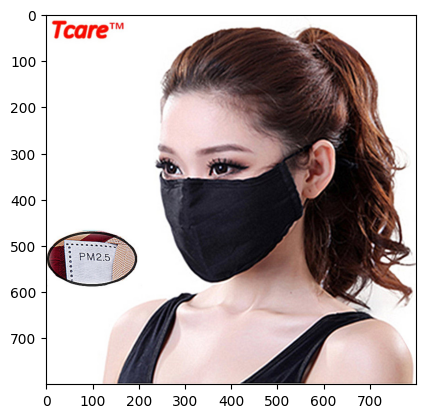

In [16]:
img = mpimg.imread(os.path.join(with_mask_dir, os.listdir(with_mask_dir)[0]))
imgplot  = plt.imshow(img)
plt.show()

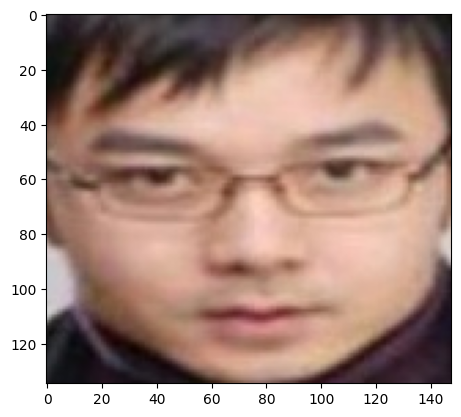

In [17]:
img = mpimg.imread(os.path.join(without_mask_dir, os.listdir(without_mask_dir)[0]))
imgplot  = plt.imshow(img)
plt.show()

In [22]:
data = []

for img_file in os.listdir(with_mask_dir):
  image = Image.open(os.path.join(with_mask_dir, img_file))
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

for img_file in os.listdir(without_mask_dir):
  image = Image.open(os.path.join(without_mask_dir, img_file))
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

In [23]:
len(data)

7553

In [24]:
type(data)

list

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [254, 254, 254],
        [253, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [252, 253, 254],
        [246, 139, 136],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [212, 175, 154],
        [218, 187, 172],
        [250, 247, 245]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [212, 175, 154],
        [220, 191, 175],
        [252, 250, 248]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [211, 174, 155],
        [219, 194, 180],
        [252, 251, 250]]], dtype=uint8)
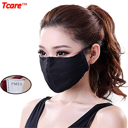

In [25]:
data[0]

In [26]:
type(data[0])

numpy.ndarray

In [27]:
data[0].shape

(128, 128, 3)

In [28]:
X = np.array(data)
Y = np.array(labels)
type(X)

numpy.ndarray

In [29]:
type(Y)

numpy.ndarray

In [30]:
print(X.shape)
print(Y.shape)

(7553, 128, 128, 3)
(7553,)


In [31]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=.2, random_state=2)
print(X.shape, X_train.shape, X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [32]:
X_train_scaled = X_train/255
X_test_scaled = X_test/255

In [33]:
X_train[[0]]

array([[[[48, 48, 60],
         [43, 43, 54],
         [36, 36, 46],
         ...,
         [92, 77, 70],
         [93, 79, 72],
         [94, 81, 73]],

        [[48, 48, 60],
         [43, 43, 55],
         [36, 36, 46],
         ...,
         [92, 77, 70],
         [93, 79, 71],
         [94, 81, 73]],

        [[45, 45, 57],
         [38, 38, 49],
         [31, 31, 41],
         ...,
         [94, 79, 74],
         [93, 78, 72],
         [93, 78, 71]],

        ...,

        [[15, 16, 21],
         [15, 16, 21],
         [16, 17, 22],
         ...,
         [16, 17, 21],
         [17, 18, 22],
         [17, 18, 22]],

        [[14, 15, 20],
         [14, 15, 20],
         [15, 16, 21],
         ...,
         [17, 18, 22],
         [17, 18, 22],
         [17, 18, 22]],

        [[14, 15, 20],
         [14, 15, 20],
         [15, 16, 21],
         ...,
         [18, 19, 23],
         [19, 20, 24],
         [19, 20, 24]]]], dtype=uint8)

In [34]:
X_train_scaled[0]

array([[[0.18823529, 0.18823529, 0.23529412],
        [0.16862745, 0.16862745, 0.21176471],
        [0.14117647, 0.14117647, 0.18039216],
        ...,
        [0.36078431, 0.30196078, 0.2745098 ],
        [0.36470588, 0.30980392, 0.28235294],
        [0.36862745, 0.31764706, 0.28627451]],

       [[0.18823529, 0.18823529, 0.23529412],
        [0.16862745, 0.16862745, 0.21568627],
        [0.14117647, 0.14117647, 0.18039216],
        ...,
        [0.36078431, 0.30196078, 0.2745098 ],
        [0.36470588, 0.30980392, 0.27843137],
        [0.36862745, 0.31764706, 0.28627451]],

       [[0.17647059, 0.17647059, 0.22352941],
        [0.14901961, 0.14901961, 0.19215686],
        [0.12156863, 0.12156863, 0.16078431],
        ...,
        [0.36862745, 0.30980392, 0.29019608],
        [0.36470588, 0.30588235, 0.28235294],
        [0.36470588, 0.30588235, 0.27843137]],

       ...,

       [[0.05882353, 0.0627451 , 0.08235294],
        [0.05882353, 0.0627451 , 0.08235294],
        [0.0627451 , 0

**Building a Convolutional Neural Networks (CNN)**

In [35]:
import tensorflow as tf
from tensorflow import keras

In [36]:
num_of_classes = 2

model = keras.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [37]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['acc']
    )

In [38]:
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=10)

Epoch 1/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 151s 870ms/step - acc: 0.6791 - loss: 0.7069 - val_acc: 0.9091 - val_loss: 0.2301
Epoch 2/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 195s 829ms/step - acc: 0.8761 - loss: 0.3059 - val_acc: 0.9124 - val_loss: 0.2136
Epoch 3/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 139s 816ms/step - acc: 0.9056 - loss: 0.2465 - val_acc: 0.9289 - val_loss: 0.1905
Epoch 4/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 150s 881ms/step - acc: 0.9163 - loss: 0.2058 - val_acc: 0.9372 - val_loss: 0.1408
Epoch 5/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 140s 827ms/step - acc: 0.9315 - loss: 0.1701 - val_acc: 0.9471 - val_loss: 0.1433
Epoch 6/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 142s 827ms/step - acc: 0.9458 - loss: 0.1397 - val_acc: 0.9273 - val_loss: 0.1862
Epoch 7/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 138s 805ms/step - acc: 0.9426 - loss: 0.1419 - val_acc: 0.9488 - val_loss: 0.1359
Epoch 8/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 140s 821ms/step - acc: 0.9675 - loss: 0.0841 - val_acc: 0.9554 - val_loss: 0.1311
Epoch 9/10
170/170 ━━━━━

In [39]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test accuracy =', accuracy)

48/48 ━━━━━━━━━━━━━━━━━━━━ 11s 229ms/step - acc: 0.9301 - loss: 0.3329
Test accuracy = 0.9305095672607422


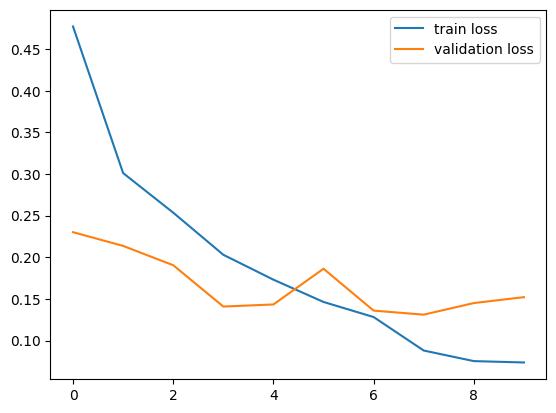

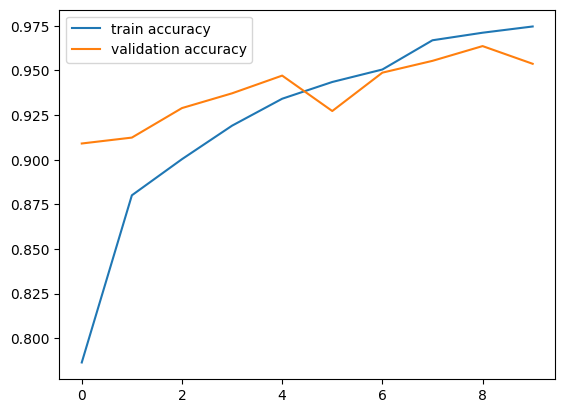

In [40]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

**Predictive System**

Path of the image to be predicted: /kaggle/input/face-mask-dataset/data/with_mask/with_mask_1000.jpg


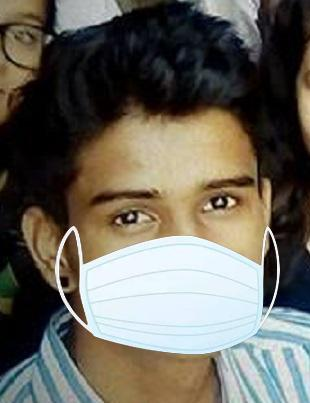

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step
[[0.05155814 0.995429  ]]
1
The person in the image is waring a mask.


In [41]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1, 128, 128, 3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 1:
  print('The person in the image is waring a mask.')
else:
  print('The person in the image in not waring a mask')